# Titanic Survival
The calamity involving the titanic(the largest passenger ship in service at the time) is well documented.

According to Wikipedia, The RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, a mere four days into her maiden voyage from Southampton, England to New York City, New York (USA). After striking an iceberg shortly before midnight, the ocean liner sank less than 3 hours later at 2:20 am ship's time. Out of an estimated 2,224 individuals, more than 1,500 perished-making it one of the deadliest peacetime maritime disasters in history.

In this project, we work with a publically available Titanic dataset and attempt to predict whether or not a passenger survives based on relevant certain features provided in the dataset.   

The dataset was taken from the following site: https://gist.github.com/fyyying/4aa5b471860321d7b47fd881898162b7

In [1]:
#Loading Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb


In [2]:
# load the data from csv file to Pandas DataFrame
titanic_df = pd.read_csv('C:\\Users\\malic\Downloads\\4aa5b471860321d7b47fd881898162b7-6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f\\titanic_dataset.csv')

In [4]:
titanic_df= pd.DataFrame(titanic_df)

# EDA

In [5]:
titanic_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [6]:
titanic_df.shape

(891, 12)

In [7]:
titanic_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#here we drop the cabin column
titanic_df = titanic_df.drop(columns='Cabin', axis=1)

In [10]:
#replacing missing values with the mean
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [11]:
#Finding the mode
print(titanic_df['Embarked'].mode())

0    S
dtype: object


In [12]:
# replacing the missing values in "Embarked" column with mode value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [13]:
#checking missing values
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# finding the number of people survived and not survived
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

In [16]:
sns.set()

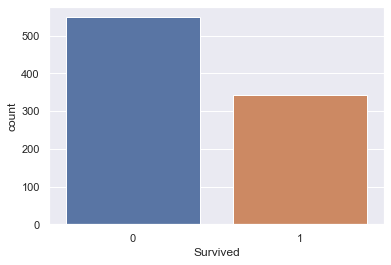

In [17]:
# making a count plot for "Survived" column
sns.countplot('Survived', data=titanic_df)

In [18]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

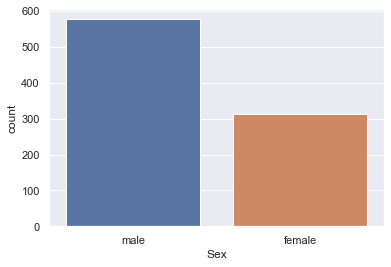

In [19]:
#Bar chart for gender
sns.countplot('Sex', data=titanic_df)

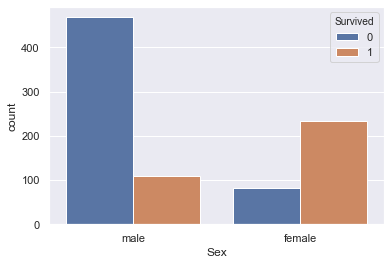

In [20]:
# number of survivors broken doen by gender
sns.countplot('Sex', hue='Survived', data=titanic_df)

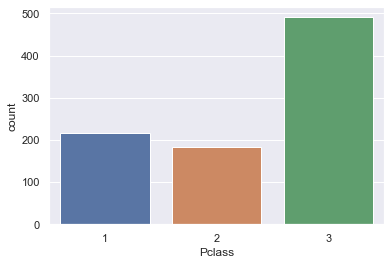

In [21]:
#Categorical plot for passenger class column

sns.countplot('Pclass', data=titanic_df)

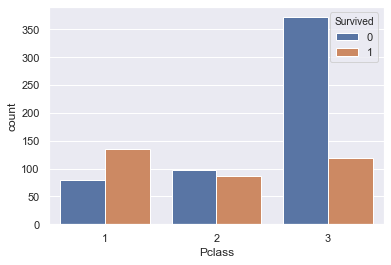

In [22]:
#Countplot for how many survived based on which passenger class they belonged to
sns.countplot('Pclass', hue='Survived', data=titanic_df)

# Encoding Categorical Columns

In [23]:
titanic_df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Distinguishing Features from Target

In [25]:
#We drop the target, and non pertinent columns
X = titanic_df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
X=X.iloc[:800,:]

In [26]:
y=titanic_df["Survived"]
y=y.iloc[:800,]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train, y_train)

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Accuracy on Training Data

In [30]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0
 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 

In [31]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print(training_data_accuracy)

0.79375


# Accuracy on Test Data

In [32]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 1 1 1]


In [33]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data =', test_data_accuracy)

Accuracy score of test data = 0.81875


In [34]:
#Accuracy on Holdout Set

In [35]:
X_hold=titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Survived"],axis=1)

X_hold=X_hold.iloc[800:,:]


In [36]:
y_hold=titanic_df["Survived"]
y_hold=y_hold.iloc[800:,]

In [37]:
X_hold_prediction=model.predict(X_hold)
print(X_hold_prediction)

[0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0]


In [76]:
hold_data_accuracy = accuracy_score(y_hold, X_hold_prediction)
print('Accuracy score of Validation data =', hold_data_accuracy)

Accuracy score of Validation data = 0.8351648351648352


# KNN Algorithm

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [44]:
knn = KNeighborsClassifier( )
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [48]:
grid.grid_scores_

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [49]:
grid.best_score_

0.6597831992568834

In [50]:
grid.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [51]:
print ("Best Estimators: ",str(grid.best_estimator_))

Best Estimators:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


In [52]:
#Bow we predict on test set
knn_pred_test = grid.predict(X_test)
# Calculating Accuracy

acc_knn_test = metrics.accuracy_score(y_test, knn_pred_test)
print ("classifier's accuracy: ",str(acc_knn_test) )

classifier's accuracy:  0.75


In [54]:
#Now we predict on Hold out set

knn_pred_hold = grid.predict(X_hold)
# Calculating Accuracy

acc_knn_hold = metrics.accuracy_score(y_hold, knn_pred_hold)
print ("classifier's accuracy: ",str(acc_knn_hold) )

classifier's accuracy:  0.7802197802197802


In [ ]:
Decision Tree

In [55]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(random_state = 0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

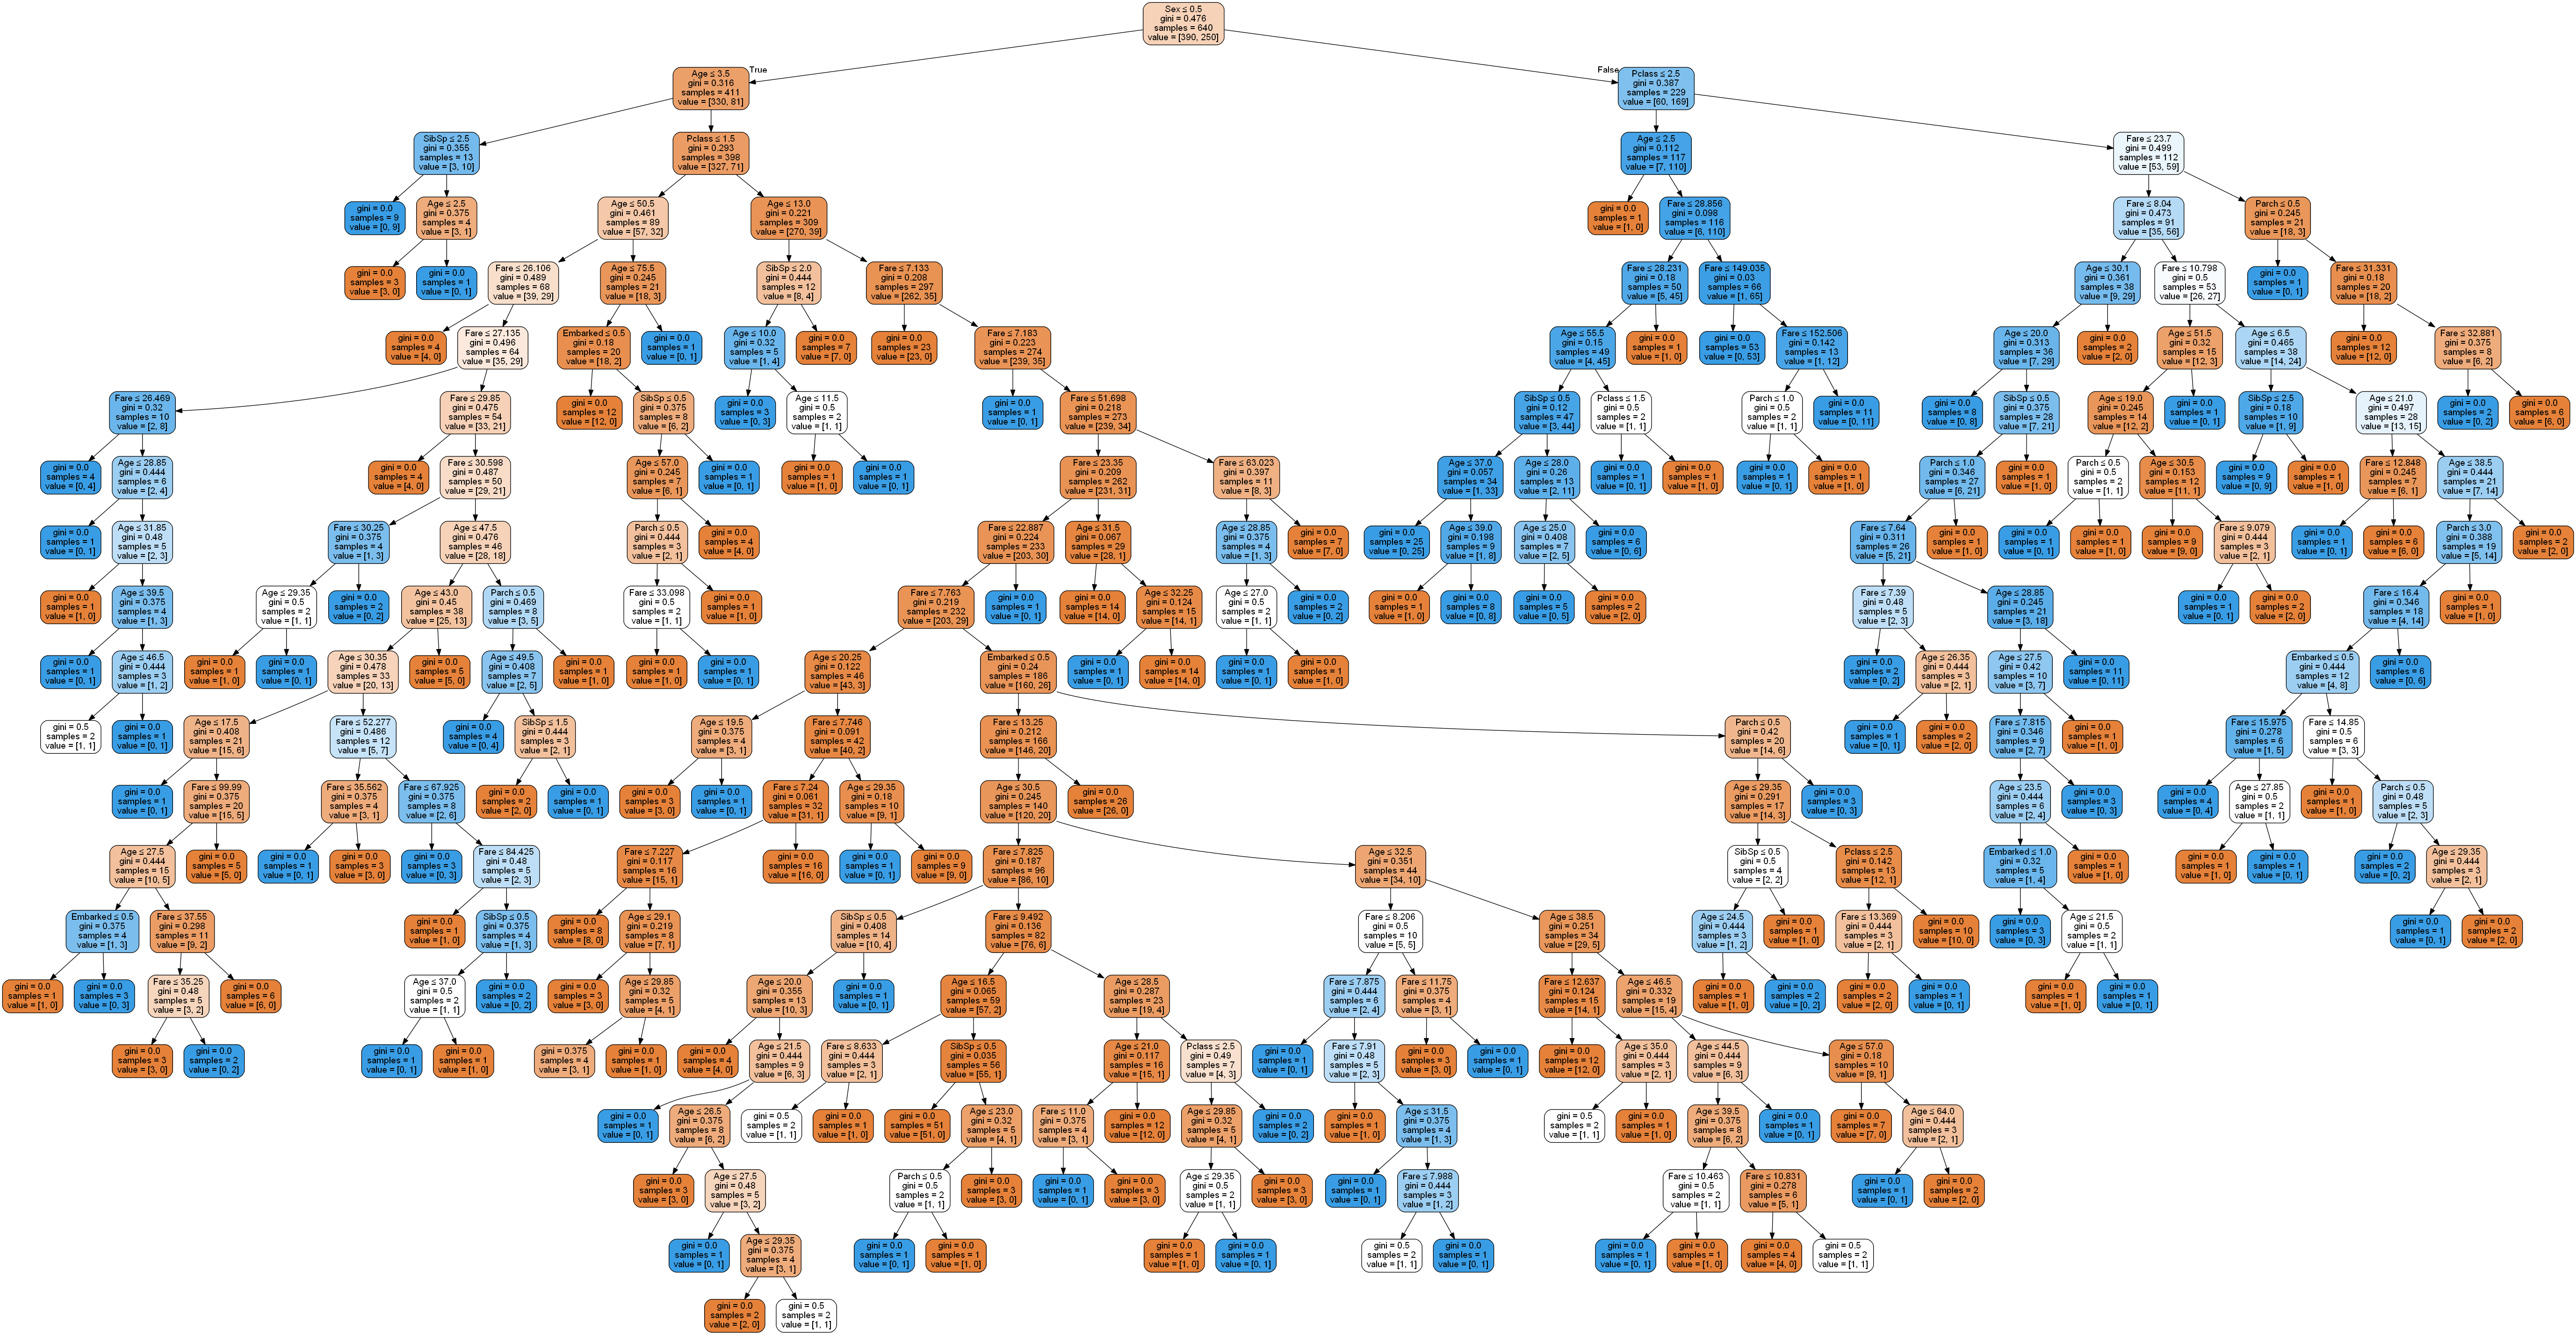

In [57]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(tree_model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())

In [65]:
tree_pred_train =tree_model.predict(X_train)  
print('Accuracy score for train data is:', accuracy_score(y_train,tree_pred_train))

tree_pred_test = tree_model.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,tree_pred_test))

tree_pred_hold = tree_model.predict(X_hold)
print('Accuracy score for test data is:', accuracy_score(y_hold,tree_pred_hold))

Accuracy score for train data is: 0.9890625
Accuracy score for test data is: 0.81875
Accuracy score for test data is: 0.7912087912087912


In [62]:
#for test set
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, tree_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  84                  18
Actual Survived              11                  47


In [66]:
#for validation set
confusion_matrix1 = pd.DataFrame(confusion_matrix(y_hold, tree_pred_hold))

confusion_matrix1.index = ['Actual Died','Actual Survived']
confusion_matrix1.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix1)


                 Predicted Died  Predicted Survived
Actual Died                  48                   9
Actual Survived              10                  24


In [ ]:
DecisionTreeClassifier!!!1

In [67]:
decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                         

In [68]:
y_pred_test_cv = grid_search.predict(X_test)

print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test_cv))

Accuracy score for test data is: 0.83125


In [70]:
#Confusion Matrix for Test after CV
confusion_matrix11 = pd.DataFrame(confusion_matrix(y_test, y_pred_test_cv))

confusion_matrix11.index = ['Actual Died','Actual Survived']
confusion_matrix11.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix11)

                 Predicted Died  Predicted Survived
Actual Died                  92                  10
Actual Survived              17                  41


In [ ]:
Note: We see that we go from 84 correctly predicted deaths  to 92 predicted deaths. 
We however go from 47 correctly predicted survivals to 41.

With gridsearch accuracy_score increased from 0.819 to 0.831 and the number of correct 
predictions increased from 131 to 133 while thenumber of false predictions increased from 29 to 27.

In [77]:
y_pred_hold_cv = grid_search.predict(X_hold)

print('Accuracy score for Validation data is:', accuracy_score(y_hold,y_pred_hold_cv))

Accuracy score for Validation data is: 0.8351648351648352


In [75]:
#Confusion Matrix for Validation Set after CV
confusion_matrix111 = pd.DataFrame(confusion_matrix(y_hold, y_pred_hold_cv))

confusion_matrix111.index = ['Actual Died','Actual Survived']
confusion_matrix111.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix111)


                 Predicted Died  Predicted Survived
Actual Died                  51                   6
Actual Survived               9                  25


In [ ]:
Note: We see that we go from 48 correctly predicted deaths to 51 correctly predicted deaths. 
We however go from 24 correctly predicted survivals to 25.

With gridsearch accuracy_score increased from 0.791 to 0.835 and the number of correct 
predictions increased from 72 to 96 while thenumber of false predictions increased from 19 to 15.

We also note that the DecisionTree performs just as well as Logistic Classifier

# Using Light GBM

In [58]:
model = lgb.LGBMClassifier(learning_rate=0.02,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

C:\Users\malic\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.537045	valid_0's binary_logloss: 0.519107
[40]	training's binary_logloss: 0.467347	valid_0's binary_logloss: 0.450184
[60]	training's binary_logloss: 0.423571	valid_0's binary_logloss: 0.409808
[80]	training's binary_logloss: 0.39369	valid_0's binary_logloss: 0.383186
[100]	training's binary_logloss: 0.372168	valid_0's binary_logloss: 0.367378


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.02, max_depth=-5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [60]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))
print('Testing accuracy {:.4f}'.format(model.score(X_hold,y_hold)))


Training accuracy 0.8500
Testing accuracy 0.8562
Testing accuracy 0.8352


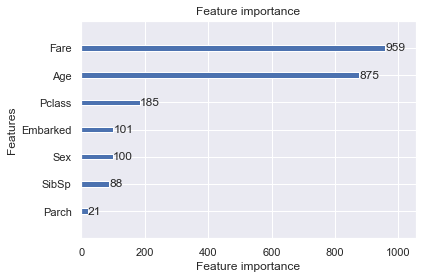

In [61]:
lgb.plot_importance(model)

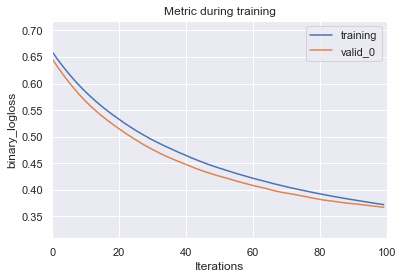

In [62]:
lgb.plot_metric(model)

# KNN Model

In [66]:
from sklearn import metrics
print(metrics.classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       102
           1       0.83      0.76      0.79        58

    accuracy                           0.86       160
   macro avg       0.85      0.84      0.84       160
weighted avg       0.86      0.86      0.85       160



# Summary

In sum we use len(number of models) logistic, decision tree strengtened with gridsearch, KNN,
and LightGBM

In the end, Light GBM won out as it did marginally better than our DecisionTree algorithm and Logistic Regression (which performed identically). Given unseen data, we can confidently use this model as a classification scheme to determine whether or not a passenger survived the trip. 

Unsurprisingly, we see that Fare, Age, and Gender are the most important features we have in our data to help us determine whether or not somebody survived.